In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('dark_background')

In [3]:
data = pd.read_csv('train.csv')

In [4]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [10]:
data.isna().sum() # Пропусков в данных нет

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [11]:
data[num_cols]

,ClientPeriod,MonthlySpending,TotalSpent
0,55,19.50,1026.35
1,72,25.85,1872.2
2,1,75.90,75.9
3,32,79.30,2570
4,60,115.25,6758.45
...,...,...,...
5277,3,30.40,82.15
5278,50,44.45,2188.45
5279,1,55.05,55.05
5280,29,76.00,2215.25


In [12]:
data.describe()

,ClientPeriod,MonthlySpending,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,0.159409,0.262022
std,24.550326,30.176464,0.366092,0.439776
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.462500,0.000000,0.000000
50%,29.000000,70.400000,0.000000,0.000000
75%,55.000000,90.050000,0.000000,1.000000
max,72.000000,118.750000,1.000000,1.000000


In [5]:
data['TotalSpent'].replace(' ', np.nan).isna().sum()#У нас были пробелы в колонке а не NaN, поэтому мы не могли построить графики
#Заменим все NaN на медианное значение

9

In [6]:
data['TotalSpent'] = data['TotalSpent'].replace(' ', np.nan)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5273 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [7]:
data['TotalSpent'] = data['TotalSpent'].astype('float')

In [8]:
data['TotalSpent'] = data['TotalSpent'].fillna(np.mean(data['TotalSpent']))

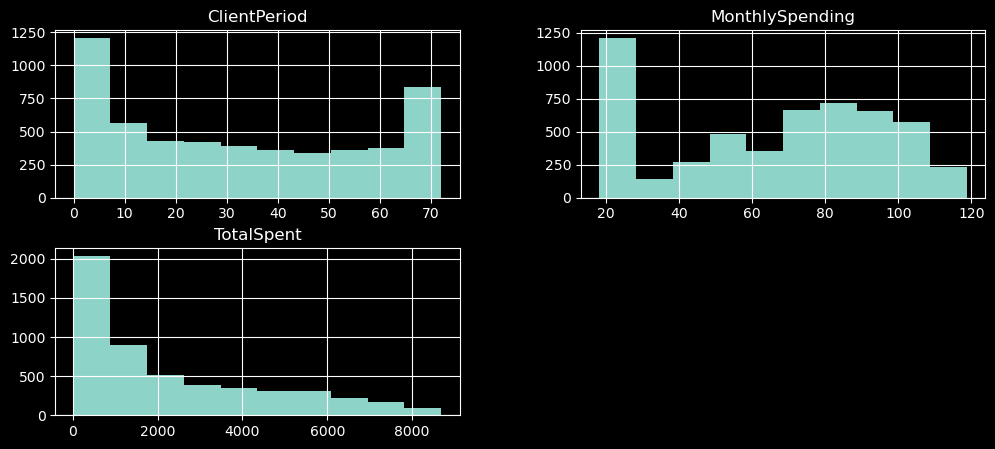

In [17]:
data[num_cols].hist(figsize=(12, 5));

<AxesSubplot:>

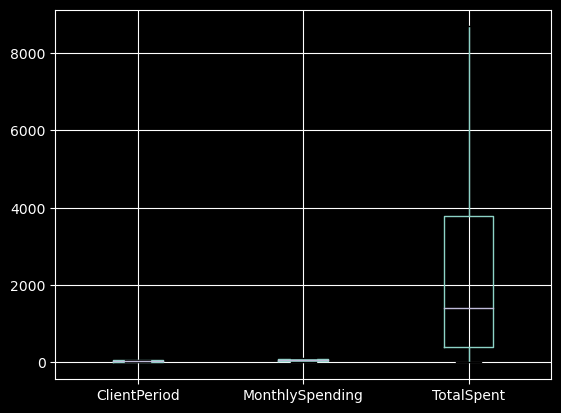

In [18]:
data.boxplot(column=num_cols)#Из за большого масштаба TotalSpent нам не видны boxplot других колонок. Построим их отдельно.

<AxesSubplot:>

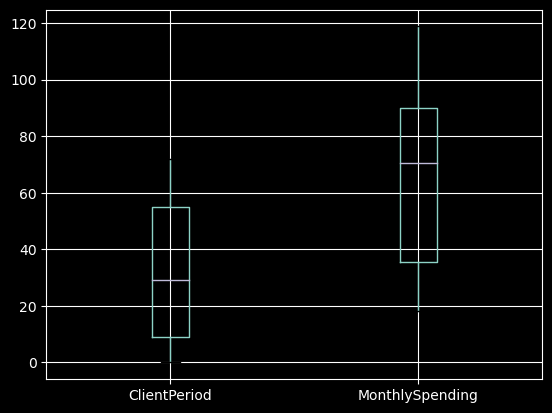

In [19]:
data.boxplot(column=['ClientPeriod', 'MonthlySpending'])

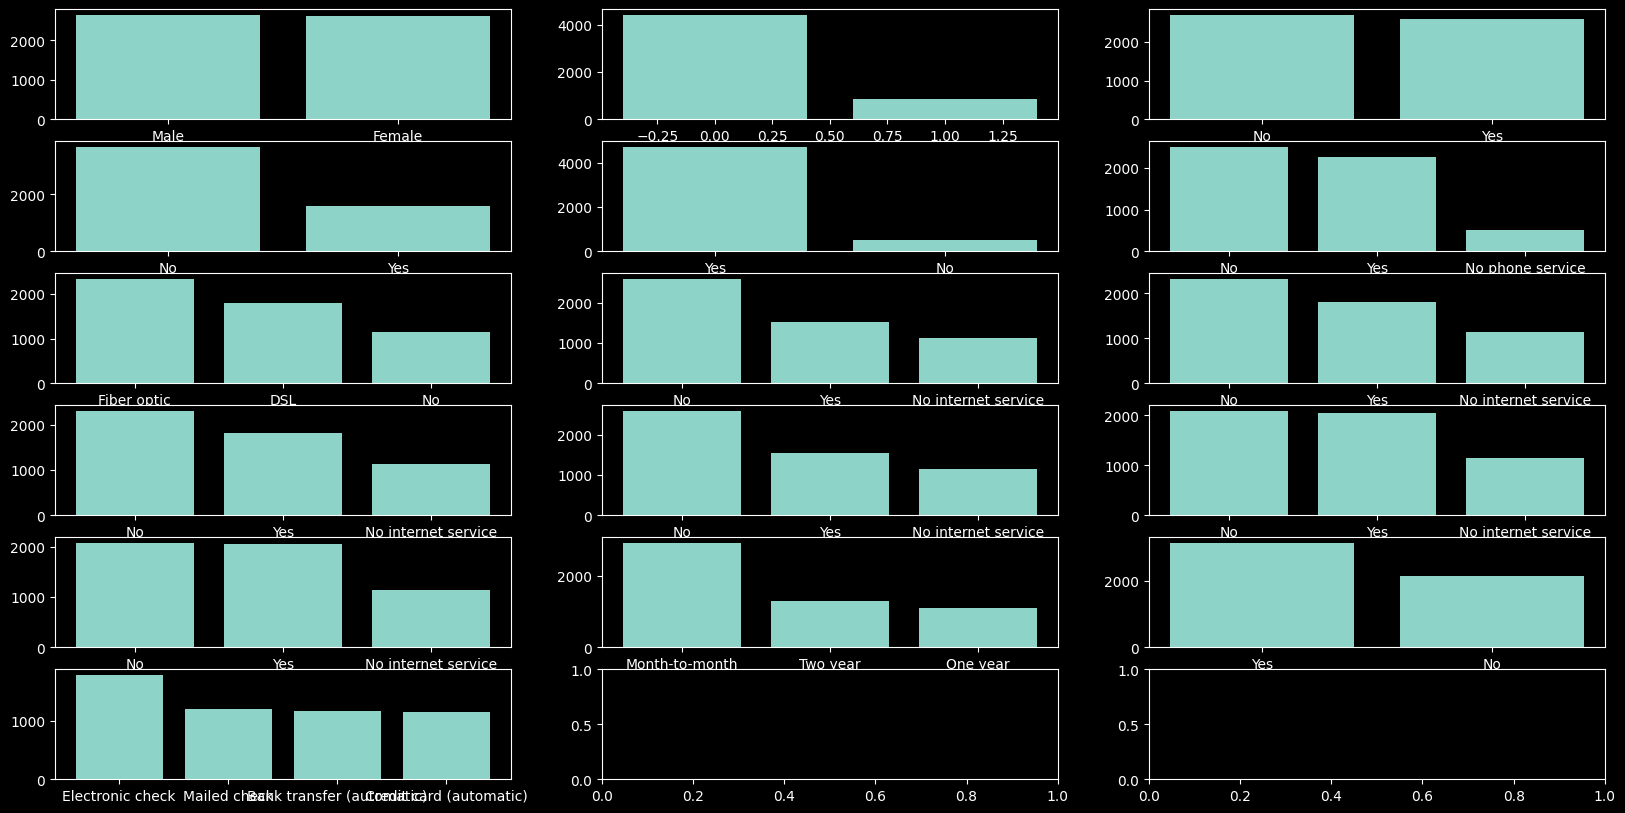

In [96]:
fig, axs = plt.subplots(nrows=6, ncols=3, figsize = (20, 10))
index = 0
for i in range(6):
    for j in range(3):
        if i == 5 and j == 1:
            break
        axs[i, j].bar(data[cat_cols[index]].value_counts().index, data[cat_cols[index]].value_counts())
        index += 1

In [114]:
data[cat_cols]

,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check
5278,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic)
5279,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check
5280,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic)


In [117]:
data.Churn.value_counts()

0    3898
1    1384
Name: Churn, dtype: int64

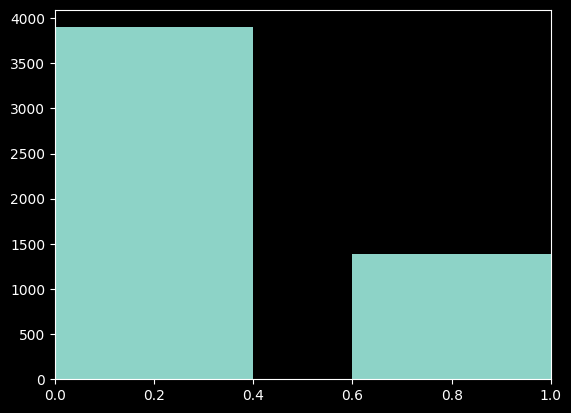

In [115]:
plt.bar(data['Churn'].value_counts().index, data['Churn'].value_counts());
plt.xlim((0, 1));

## Применение линейных моделей

In [9]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Churn', axis=1), data.Churn, test_size=0.2)

In [11]:
numeric_transformer = make_pipeline(StandardScaler())
preprocessor = ColumnTransformer(
    [
        ('num', numeric_transformer, num_cols),
        (
            'cat',
            #LabelEncoder(),
            OneHotEncoder(handle_unknown='ignore', sparse=False),
            cat_cols
        )
    ],
    verbose_feature_names_out = False,
)
# подготовка и обучение алгоритма
alg = Pipeline(steps=[
    ('enc', preprocessor), # подготовка
    ('alg', LogisticRegression()) # алгоритм
])

In [12]:
parameters = {
    # название этпапа подготовки__гиперпараметр: [сетка (список) параметров]
    'alg__penalty' : ['l1', 'l2', 'elasticnet', None],
    'alg__C': np.arange(0, 5, 0.2),
    'alg__solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky']
}

In [ ]:
gs = GridSearchCV(alg, # выбор алгоритма или пайплайна (подготовка + алгоритм)
                  parameters, # сетка гиперпараметров
                  cv=5, # количество фолдов кросс-валидации
                  verbose=2, # отображать процесс перебора гиперпараметров
                  n_jobs=2) # параллелизм вычислений

gs.fit(X_train, y_train)
gs.best_params_

In [137]:
preds = gs.best_estimator_.predict(X_test)

roc_auc_score(y_test, preds)

0.7282895517754585

## Применение градиентного бустинга

In [13]:
from catboost import CatBoostClassifier

In [126]:
cat_model = CatBoostClassifier(depth = 4,
 early_stopping_rounds = 10,
 grow_policy = 'Lossguide',
 iterations = 300,
 l2_leaf_reg = 10,
 learning_rate = 0.05,
 loss_function = 'CrossEntropy',
 metric_period = 1000,
 min_data_in_leaf = 100,
 random_seed = 42,
 subsample = 0.6)

In [127]:
cat_model.fit(X_train, y_train, cat_features=cat_cols)

0:	learn: 0.6680996	total: 60.6ms	remaining: 18.1s
299:	learn: 0.3834871	total: 12.6s	remaining: 0us


In [113]:
preds = cat_model.predict_proba(X_test)[:, 1]

roc_auc_score(y_test, preds)

0.8444244017488417

<h1>AutoML</h1>

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob

import warnings
warnings.filterwarnings("ignore")


#preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer, quantile_transform


#statistics
from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import randint

#feature engineering
from sklearn.feature_selection import mutual_info_regression


#transformers and pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config


#algorithms
from xgboost import XGBRegressor
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split


#model evaluation
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
import optuna
from optuna.samplers import TPESampler
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice


#stacking
from sklearn.ensemble import StackingRegressor

In [89]:
from sklego.linear_model import EqualOpportunityClassifier

In [90]:
from flaml import AutoML

In [91]:
class FeatureCreator(BaseEstimator, TransformerMixin):
    def __init__(self, add_attributes=True):

        self.add_attributes = add_attributes

    def fit(self, X, y=None):

        return self

    def transform(self, X):

        if self.add_attributes:
            X_copy = X.copy()
            return X_copy
        else:
            return X_copy
Creator = FeatureCreator(add_attributes = True)

In [92]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
#tree preprocessor
tree_preprocessor = ColumnTransformer(remainder='passthrough',
    transformers=[
        ('categorical_transformer', categorical_transformer, cat_cols)
    ])

tree_preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('categorical_transformer',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'IsSeniorCitizen', 'HasPartner',
                                  'HasChild', 'HasPhoneService',
                                  'HasMultiplePhoneNumbers',
                                  'HasInternetService',
                                  'HasOnlineSecurityService', 'HasOnlineBackup',
                                  'HasDeviceProtection', 'HasTechSupportAccess',
                                  'HasOnlineTV', 'HasMovieSubscription',
                                  'HasContractPhone', 'IsBillingPaperless',
                                  'PaymentMethod'])])

In [93]:
automl = AutoML()

automl_pipeline = Pipeline([
    ('Creator', Creator),
    ('tree_preprocessor', tree_preprocessor),
    ("automl", automl)
])
automl_pipeline

Pipeline(steps=[('Creator', FeatureCreator()),
                ('tree_preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical_transformer',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'IsSeniorCitizen',
                                                   'HasPartner', 'HasChild',
                                                   'HasPhoneService',
                                                   'HasMultiplePhoneNumbers',
                                                   'HasInternetService',
                                                   'HasOnlineSecurityS...
                        keep_search_state=False, learner_selector='sample',
                        log_file_name='', log_training_metric=Fals

In [63]:
df = data

In [65]:
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder. fit_transform(df[cat_cols]). toarray ())

#merge one-hot encoded columns back with original DataFrame
final_df = df.join (encoder_df)

In [68]:
final_df = final_df.drop(cat_cols, axis=1)

In [132]:
automl_settings = {
    "time_budget": 500,  # total running time in seconds
    "task": 'classification',  # task type
    "seed": 24545678,  # random seed
    "metric" : 'roc_auc',
    "eval_method" : 'cv',
    "n_splits" : 5,
    "ensemble" : True,
        "ensemble": {
        "final_estimator": CatBoostClassifier(),
        "passthrough": True
    },


}

pipeline_settings = {f"automl__{key}": value for key, value in automl_settings.items()}
automl_pipeline = automl_pipeline.fit(data.drop('Churn', axis=1), data.Churn, **pipeline_settings)

[flaml.automl.logger: 06-16 18:06:49] {1693} INFO - task = classification
[flaml.automl.logger: 06-16 18:06:49] {1700} INFO - Data split method: stratified
[flaml.automl.logger: 06-16 18:06:49] {1703} INFO - Evaluation method: cv
[flaml.automl.logger: 06-16 18:06:49] {1801} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 06-16 18:06:49] {1911} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 06-16 18:06:49] {2221} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 06-16 18:06:50] {2347} INFO - Estimated sufficient time budget=1000s. Estimated necessary time budget=25s.
[flaml.automl.logger: 06-16 18:06:50] {2394} INFO -  at 0.1s,	estimator lgbm's best error=0.1877,	best estimator lgbm's best error=0.1877
[flaml.automl.logger: 06-16 18:06:50] {2221} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 06-16 18:06:50] {2394} INFO -  at 0.2s,	estimator lgbm's 

[flaml.automl.logger: 06-16 18:06:56] {2394} INFO -  at 6.1s,	estimator extra_tree's best error=0.1636,	best estimator lgbm's best error=0.1539
[flaml.automl.logger: 06-16 18:06:56] {2221} INFO - iteration 34, current learner lgbm
[flaml.automl.logger: 06-16 18:06:56] {2394} INFO -  at 6.3s,	estimator lgbm's best error=0.1533,	best estimator lgbm's best error=0.1533
[flaml.automl.logger: 06-16 18:06:56] {2221} INFO - iteration 35, current learner rf
[flaml.automl.logger: 06-16 18:06:56] {2394} INFO -  at 6.5s,	estimator rf's best error=0.1720,	best estimator lgbm's best error=0.1533
[flaml.automl.logger: 06-16 18:06:56] {2221} INFO - iteration 36, current learner extra_tree
[flaml.automl.logger: 06-16 18:06:56] {2394} INFO -  at 6.8s,	estimator extra_tree's best error=0.1636,	best estimator lgbm's best error=0.1533
[flaml.automl.logger: 06-16 18:06:56] {2221} INFO - iteration 37, current learner xgboost
[flaml.automl.logger: 06-16 18:06:56] {2394} INFO -  at 7.0s,	estimator xgboost's b

[flaml.automl.logger: 06-16 18:07:08] {2221} INFO - iteration 69, current learner lgbm
[flaml.automl.logger: 06-16 18:07:09] {2394} INFO -  at 19.1s,	estimator lgbm's best error=0.1532,	best estimator xgboost's best error=0.1529
[flaml.automl.logger: 06-16 18:07:09] {2221} INFO - iteration 70, current learner catboost
[flaml.automl.logger: 06-16 18:07:10] {2394} INFO -  at 20.5s,	estimator catboost's best error=0.1545,	best estimator xgboost's best error=0.1529
[flaml.automl.logger: 06-16 18:07:10] {2221} INFO - iteration 71, current learner xgboost
[flaml.automl.logger: 06-16 18:07:10] {2394} INFO -  at 20.6s,	estimator xgboost's best error=0.1529,	best estimator xgboost's best error=0.1529
[flaml.automl.logger: 06-16 18:07:10] {2221} INFO - iteration 72, current learner catboost
[flaml.automl.logger: 06-16 18:07:13] {2394} INFO -  at 23.2s,	estimator catboost's best error=0.1545,	best estimator xgboost's best error=0.1529
[flaml.automl.logger: 06-16 18:07:13] {2221} INFO - iteration 

[flaml.automl.logger: 06-16 18:07:27] {2221} INFO - iteration 104, current learner xgboost
[flaml.automl.logger: 06-16 18:07:27] {2394} INFO -  at 37.8s,	estimator xgboost's best error=0.1529,	best estimator xgboost's best error=0.1529
[flaml.automl.logger: 06-16 18:07:27] {2221} INFO - iteration 105, current learner rf
[flaml.automl.logger: 06-16 18:07:28] {2394} INFO -  at 38.4s,	estimator rf's best error=0.1578,	best estimator xgboost's best error=0.1529
[flaml.automl.logger: 06-16 18:07:28] {2221} INFO - iteration 106, current learner catboost
[flaml.automl.logger: 06-16 18:07:30] {2394} INFO -  at 40.1s,	estimator catboost's best error=0.1543,	best estimator xgboost's best error=0.1529
[flaml.automl.logger: 06-16 18:07:30] {2221} INFO - iteration 107, current learner extra_tree
[flaml.automl.logger: 06-16 18:07:30] {2394} INFO -  at 40.4s,	estimator extra_tree's best error=0.1602,	best estimator xgboost's best error=0.1529
[flaml.automl.logger: 06-16 18:07:30] {2221} INFO - iterat

[flaml.automl.logger: 06-16 18:07:49] {2221} INFO - iteration 139, current learner extra_tree
[flaml.automl.logger: 06-16 18:07:49] {2394} INFO -  at 59.9s,	estimator extra_tree's best error=0.1585,	best estimator xgboost's best error=0.1513
[flaml.automl.logger: 06-16 18:07:49] {2221} INFO - iteration 140, current learner catboost
[flaml.automl.logger: 06-16 18:07:53] {2394} INFO -  at 63.3s,	estimator catboost's best error=0.1543,	best estimator xgboost's best error=0.1513
[flaml.automl.logger: 06-16 18:07:53] {2221} INFO - iteration 141, current learner extra_tree
[flaml.automl.logger: 06-16 18:07:53] {2394} INFO -  at 63.8s,	estimator extra_tree's best error=0.1585,	best estimator xgboost's best error=0.1513
[flaml.automl.logger: 06-16 18:07:53] {2221} INFO - iteration 142, current learner extra_tree
[flaml.automl.logger: 06-16 18:07:54] {2394} INFO -  at 65.0s,	estimator extra_tree's best error=0.1585,	best estimator xgboost's best error=0.1513
[flaml.automl.logger: 06-16 18:07:54

[flaml.automl.logger: 06-16 18:08:14] {2221} INFO - iteration 174, current learner catboost
[flaml.automl.logger: 06-16 18:08:16] {2394} INFO -  at 86.1s,	estimator catboost's best error=0.1541,	best estimator xgboost's best error=0.1513
[flaml.automl.logger: 06-16 18:08:16] {2221} INFO - iteration 175, current learner lgbm
[flaml.automl.logger: 06-16 18:08:16] {2394} INFO -  at 86.5s,	estimator lgbm's best error=0.1528,	best estimator xgboost's best error=0.1513
[flaml.automl.logger: 06-16 18:08:16] {2221} INFO - iteration 176, current learner extra_tree
[flaml.automl.logger: 06-16 18:08:17] {2394} INFO -  at 87.1s,	estimator extra_tree's best error=0.1585,	best estimator xgboost's best error=0.1513
[flaml.automl.logger: 06-16 18:08:17] {2221} INFO - iteration 177, current learner catboost
[flaml.automl.logger: 06-16 18:08:19] {2394} INFO -  at 89.4s,	estimator catboost's best error=0.1541,	best estimator xgboost's best error=0.1513
[flaml.automl.logger: 06-16 18:08:19] {2221} INFO - 

[flaml.automl.logger: 06-16 18:08:33] {2221} INFO - iteration 209, current learner rf
[flaml.automl.logger: 06-16 18:08:34] {2394} INFO -  at 104.6s,	estimator rf's best error=0.1578,	best estimator xgboost's best error=0.1513
[flaml.automl.logger: 06-16 18:08:34] {2221} INFO - iteration 210, current learner catboost
[flaml.automl.logger: 06-16 18:08:37] {2394} INFO -  at 107.0s,	estimator catboost's best error=0.1541,	best estimator xgboost's best error=0.1513
[flaml.automl.logger: 06-16 18:08:37] {2221} INFO - iteration 211, current learner xgboost
[flaml.automl.logger: 06-16 18:08:37] {2394} INFO -  at 107.2s,	estimator xgboost's best error=0.1513,	best estimator xgboost's best error=0.1513
[flaml.automl.logger: 06-16 18:08:37] {2221} INFO - iteration 212, current learner catboost
[flaml.automl.logger: 06-16 18:08:40] {2394} INFO -  at 110.5s,	estimator catboost's best error=0.1541,	best estimator xgboost's best error=0.1513
[flaml.automl.logger: 06-16 18:08:40] {2221} INFO - iterat

[flaml.automl.logger: 06-16 18:08:57] {2221} INFO - iteration 244, current learner xgboost
[flaml.automl.logger: 06-16 18:08:57] {2394} INFO -  at 127.6s,	estimator xgboost's best error=0.1513,	best estimator xgboost's best error=0.1513
[flaml.automl.logger: 06-16 18:08:57] {2221} INFO - iteration 245, current learner rf
[flaml.automl.logger: 06-16 18:08:58] {2394} INFO -  at 128.2s,	estimator rf's best error=0.1578,	best estimator xgboost's best error=0.1513
[flaml.automl.logger: 06-16 18:08:58] {2221} INFO - iteration 246, current learner xgboost
[flaml.automl.logger: 06-16 18:08:58] {2394} INFO -  at 128.4s,	estimator xgboost's best error=0.1513,	best estimator xgboost's best error=0.1513
[flaml.automl.logger: 06-16 18:08:58] {2221} INFO - iteration 247, current learner xgboost
[flaml.automl.logger: 06-16 18:08:58] {2394} INFO -  at 128.6s,	estimator xgboost's best error=0.1513,	best estimator xgboost's best error=0.1513
[flaml.automl.logger: 06-16 18:08:58] {2221} INFO - iteration 

[flaml.automl.logger: 06-16 18:09:08] {2221} INFO - iteration 278, current learner xgb_limitdepth
[flaml.automl.logger: 06-16 18:09:08] {2394} INFO -  at 138.5s,	estimator xgb_limitdepth's best error=0.1534,	best estimator xgboost's best error=0.1513
[flaml.automl.logger: 06-16 18:09:08] {2221} INFO - iteration 279, current learner extra_tree
[flaml.automl.logger: 06-16 18:09:09] {2394} INFO -  at 139.5s,	estimator extra_tree's best error=0.1585,	best estimator xgboost's best error=0.1513
[flaml.automl.logger: 06-16 18:09:09] {2221} INFO - iteration 280, current learner xgb_limitdepth
[flaml.automl.logger: 06-16 18:09:09] {2394} INFO -  at 139.8s,	estimator xgb_limitdepth's best error=0.1534,	best estimator xgboost's best error=0.1513
[flaml.automl.logger: 06-16 18:09:09] {2221} INFO - iteration 281, current learner xgb_limitdepth
[flaml.automl.logger: 06-16 18:09:10] {2394} INFO -  at 140.1s,	estimator xgb_limitdepth's best error=0.1534,	best estimator xgboost's best error=0.1513
[fla

[flaml.automl.logger: 06-16 18:09:24] {2221} INFO - iteration 312, current learner catboost
[flaml.automl.logger: 06-16 18:09:26] {2394} INFO -  at 156.5s,	estimator catboost's best error=0.1541,	best estimator xgboost's best error=0.1513
[flaml.automl.logger: 06-16 18:09:26] {2221} INFO - iteration 313, current learner rf
[flaml.automl.logger: 06-16 18:09:27] {2394} INFO -  at 157.5s,	estimator rf's best error=0.1545,	best estimator xgboost's best error=0.1513
[flaml.automl.logger: 06-16 18:09:27] {2221} INFO - iteration 314, current learner rf
[flaml.automl.logger: 06-16 18:09:28] {2394} INFO -  at 158.4s,	estimator rf's best error=0.1545,	best estimator xgboost's best error=0.1513
[flaml.automl.logger: 06-16 18:09:28] {2221} INFO - iteration 315, current learner rf
[flaml.automl.logger: 06-16 18:09:28] {2394} INFO -  at 159.0s,	estimator rf's best error=0.1545,	best estimator xgboost's best error=0.1513
[flaml.automl.logger: 06-16 18:09:28] {2221} INFO - iteration 316, current learn

[flaml.automl.logger: 06-16 18:09:46] {2221} INFO - iteration 347, current learner xgb_limitdepth
[flaml.automl.logger: 06-16 18:09:46] {2394} INFO -  at 176.8s,	estimator xgb_limitdepth's best error=0.1520,	best estimator xgboost's best error=0.1513
[flaml.automl.logger: 06-16 18:09:46] {2221} INFO - iteration 348, current learner xgb_limitdepth
[flaml.automl.logger: 06-16 18:09:46] {2394} INFO -  at 177.0s,	estimator xgb_limitdepth's best error=0.1520,	best estimator xgboost's best error=0.1513
[flaml.automl.logger: 06-16 18:09:46] {2221} INFO - iteration 349, current learner xgb_limitdepth
[flaml.automl.logger: 06-16 18:09:47] {2394} INFO -  at 177.6s,	estimator xgb_limitdepth's best error=0.1520,	best estimator xgboost's best error=0.1513
[flaml.automl.logger: 06-16 18:09:47] {2221} INFO - iteration 350, current learner lgbm
[flaml.automl.logger: 06-16 18:09:47] {2394} INFO -  at 177.8s,	estimator lgbm's best error=0.1528,	best estimator xgboost's best error=0.1513
[flaml.automl.lo

[flaml.automl.logger: 06-16 18:10:03] {2394} INFO -  at 193.4s,	estimator rf's best error=0.1545,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:10:03] {2221} INFO - iteration 382, current learner xgb_limitdepth
[flaml.automl.logger: 06-16 18:10:03] {2394} INFO -  at 193.9s,	estimator xgb_limitdepth's best error=0.1518,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:10:03] {2221} INFO - iteration 383, current learner extra_tree
[flaml.automl.logger: 06-16 18:10:04] {2394} INFO -  at 194.8s,	estimator extra_tree's best error=0.1585,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:10:04] {2221} INFO - iteration 384, current learner extra_tree
[flaml.automl.logger: 06-16 18:10:06] {2394} INFO -  at 196.4s,	estimator extra_tree's best error=0.1585,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:10:06] {2221} INFO - iteration 385, current learner lgbm
[flaml.automl.logger: 06-16 18:10:

[flaml.automl.logger: 06-16 18:10:23] {2221} INFO - iteration 416, current learner lgbm
[flaml.automl.logger: 06-16 18:10:24] {2394} INFO -  at 214.1s,	estimator lgbm's best error=0.1528,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:10:24] {2221} INFO - iteration 417, current learner xgboost
[flaml.automl.logger: 06-16 18:10:24] {2394} INFO -  at 214.3s,	estimator xgboost's best error=0.1511,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:10:24] {2221} INFO - iteration 418, current learner xgb_limitdepth
[flaml.automl.logger: 06-16 18:10:24] {2394} INFO -  at 214.6s,	estimator xgb_limitdepth's best error=0.1518,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:10:24] {2221} INFO - iteration 419, current learner extra_tree
[flaml.automl.logger: 06-16 18:10:25] {2394} INFO -  at 215.4s,	estimator extra_tree's best error=0.1585,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:10:25] 

[flaml.automl.logger: 06-16 18:10:38] {2394} INFO -  at 228.3s,	estimator xgb_limitdepth's best error=0.1518,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:10:38] {2221} INFO - iteration 451, current learner xgb_limitdepth
[flaml.automl.logger: 06-16 18:10:38] {2394} INFO -  at 228.5s,	estimator xgb_limitdepth's best error=0.1518,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:10:38] {2221} INFO - iteration 452, current learner xgb_limitdepth
[flaml.automl.logger: 06-16 18:10:39] {2394} INFO -  at 229.1s,	estimator xgb_limitdepth's best error=0.1518,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:10:39] {2221} INFO - iteration 453, current learner xgb_limitdepth
[flaml.automl.logger: 06-16 18:10:39] {2394} INFO -  at 229.2s,	estimator xgb_limitdepth's best error=0.1518,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:10:39] {2221} INFO - iteration 454, current learner lgbm
[flaml

[flaml.automl.logger: 06-16 18:10:58] {2221} INFO - iteration 485, current learner xgboost
[flaml.automl.logger: 06-16 18:10:58] {2394} INFO -  at 248.6s,	estimator xgboost's best error=0.1511,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:10:58] {2221} INFO - iteration 486, current learner rf
[flaml.automl.logger: 06-16 18:10:59] {2394} INFO -  at 249.3s,	estimator rf's best error=0.1545,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:10:59] {2221} INFO - iteration 487, current learner xgb_limitdepth
[flaml.automl.logger: 06-16 18:10:59] {2394} INFO -  at 249.9s,	estimator xgb_limitdepth's best error=0.1518,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:10:59] {2221} INFO - iteration 488, current learner xgboost
[flaml.automl.logger: 06-16 18:11:00] {2394} INFO -  at 250.1s,	estimator xgboost's best error=0.1511,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:11:00] {2221} INF

[flaml.automl.logger: 06-16 18:11:17] {2221} INFO - iteration 520, current learner xgboost
[flaml.automl.logger: 06-16 18:11:17] {2394} INFO -  at 267.7s,	estimator xgboost's best error=0.1511,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:11:17] {2221} INFO - iteration 521, current learner xgboost
[flaml.automl.logger: 06-16 18:11:18] {2394} INFO -  at 268.2s,	estimator xgboost's best error=0.1511,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:11:18] {2221} INFO - iteration 522, current learner xgboost
[flaml.automl.logger: 06-16 18:11:18] {2394} INFO -  at 268.3s,	estimator xgboost's best error=0.1511,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:11:18] {2221} INFO - iteration 523, current learner lgbm
[flaml.automl.logger: 06-16 18:11:18] {2394} INFO -  at 268.8s,	estimator lgbm's best error=0.1525,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:11:18] {2221} INFO - iterat

[flaml.automl.logger: 06-16 18:11:34] {2394} INFO -  at 284.2s,	estimator xgb_limitdepth's best error=0.1518,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:11:34] {2221} INFO - iteration 555, current learner lgbm
[flaml.automl.logger: 06-16 18:11:34] {2394} INFO -  at 284.4s,	estimator lgbm's best error=0.1525,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:11:34] {2221} INFO - iteration 556, current learner catboost
[flaml.automl.logger: 06-16 18:11:36] {2394} INFO -  at 286.9s,	estimator catboost's best error=0.1541,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:11:36] {2221} INFO - iteration 557, current learner xgboost
[flaml.automl.logger: 06-16 18:11:37] {2394} INFO -  at 287.1s,	estimator xgboost's best error=0.1511,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:11:37] {2221} INFO - iteration 558, current learner extra_tree
[flaml.automl.logger: 06-16 18:11:38] {2394} I

[flaml.automl.logger: 06-16 18:11:52] {2221} INFO - iteration 589, current learner rf
[flaml.automl.logger: 06-16 18:11:53] {2394} INFO -  at 303.5s,	estimator rf's best error=0.1545,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:11:53] {2221} INFO - iteration 590, current learner extra_tree
[flaml.automl.logger: 06-16 18:11:54] {2394} INFO -  at 304.2s,	estimator extra_tree's best error=0.1584,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:11:54] {2221} INFO - iteration 591, current learner catboost
[flaml.automl.logger: 06-16 18:11:55] {2394} INFO -  at 305.6s,	estimator catboost's best error=0.1541,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:11:55] {2221} INFO - iteration 592, current learner xgb_limitdepth
[flaml.automl.logger: 06-16 18:11:56] {2394} INFO -  at 306.0s,	estimator xgb_limitdepth's best error=0.1518,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:11:56] {2

[flaml.automl.logger: 06-16 18:12:36] {2221} INFO - iteration 624, current learner rf
[flaml.automl.logger: 06-16 18:12:37] {2394} INFO -  at 347.1s,	estimator rf's best error=0.1545,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:12:37] {2221} INFO - iteration 625, current learner xgboost
[flaml.automl.logger: 06-16 18:12:37] {2394} INFO -  at 347.4s,	estimator xgboost's best error=0.1511,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:12:37] {2221} INFO - iteration 626, current learner xgboost
[flaml.automl.logger: 06-16 18:12:37] {2394} INFO -  at 347.5s,	estimator xgboost's best error=0.1511,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:12:37] {2221} INFO - iteration 627, current learner lgbm
[flaml.automl.logger: 06-16 18:12:37] {2394} INFO -  at 347.8s,	estimator lgbm's best error=0.1525,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:12:37] {2221} INFO - iteration 628, c

[flaml.automl.logger: 06-16 18:13:01] {2221} INFO - iteration 659, current learner xgb_limitdepth
[flaml.automl.logger: 06-16 18:13:01] {2394} INFO -  at 371.6s,	estimator xgb_limitdepth's best error=0.1518,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:13:01] {2221} INFO - iteration 660, current learner lgbm
[flaml.automl.logger: 06-16 18:13:01] {2394} INFO -  at 371.9s,	estimator lgbm's best error=0.1525,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:13:01] {2221} INFO - iteration 661, current learner lrl1
[flaml.automl.logger: 06-16 18:13:04] {2394} INFO -  at 374.6s,	estimator lrl1's best error=0.2541,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:13:04] {2221} INFO - iteration 662, current learner lgbm
[flaml.automl.logger: 06-16 18:13:04] {2394} INFO -  at 375.0s,	estimator lgbm's best error=0.1525,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:13:04] {2221} INFO - iter

[flaml.automl.logger: 06-16 18:13:30] {2394} INFO -  at 400.2s,	estimator xgb_limitdepth's best error=0.1518,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:13:30] {2221} INFO - iteration 694, current learner extra_tree
[flaml.automl.logger: 06-16 18:13:31] {2394} INFO -  at 401.2s,	estimator extra_tree's best error=0.1584,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:13:31] {2221} INFO - iteration 695, current learner xgboost
[flaml.automl.logger: 06-16 18:13:31] {2394} INFO -  at 401.4s,	estimator xgboost's best error=0.1511,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:13:31] {2221} INFO - iteration 696, current learner xgb_limitdepth
[flaml.automl.logger: 06-16 18:13:31] {2394} INFO -  at 401.6s,	estimator xgb_limitdepth's best error=0.1518,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:13:31] {2221} INFO - iteration 697, current learner lgbm
[flaml.automl.logger: 06-16 

[flaml.automl.logger: 06-16 18:13:54] {2221} INFO - iteration 728, current learner lrl1
[flaml.automl.logger: 06-16 18:13:57] {2394} INFO -  at 427.1s,	estimator lrl1's best error=0.2541,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:13:57] {2221} INFO - iteration 729, current learner extra_tree
[flaml.automl.logger: 06-16 18:13:57] {2394} INFO -  at 427.8s,	estimator extra_tree's best error=0.1580,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:13:57] {2221} INFO - iteration 730, current learner xgb_limitdepth
[flaml.automl.logger: 06-16 18:13:58] {2394} INFO -  at 428.4s,	estimator xgb_limitdepth's best error=0.1518,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:13:58] {2221} INFO - iteration 731, current learner extra_tree
[flaml.automl.logger: 06-16 18:13:58] {2394} INFO -  at 428.8s,	estimator extra_tree's best error=0.1580,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:1

[flaml.automl.logger: 06-16 18:14:28] {2394} INFO -  at 458.3s,	estimator xgb_limitdepth's best error=0.1518,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:14:28] {2221} INFO - iteration 763, current learner xgboost
[flaml.automl.logger: 06-16 18:14:28] {2394} INFO -  at 458.5s,	estimator xgboost's best error=0.1511,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:14:28] {2221} INFO - iteration 764, current learner extra_tree
[flaml.automl.logger: 06-16 18:14:29] {2394} INFO -  at 459.1s,	estimator extra_tree's best error=0.1580,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:14:29] {2221} INFO - iteration 765, current learner xgboost
[flaml.automl.logger: 06-16 18:14:29] {2394} INFO -  at 459.5s,	estimator xgboost's best error=0.1511,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:14:29] {2221} INFO - iteration 766, current learner extra_tree
[flaml.automl.logger: 06-16 18:14:29

[flaml.automl.logger: 06-16 18:14:54] {2221} INFO - iteration 797, current learner xgboost
[flaml.automl.logger: 06-16 18:14:54] {2394} INFO -  at 484.7s,	estimator xgboost's best error=0.1511,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:14:54] {2221} INFO - iteration 798, current learner xgboost
[flaml.automl.logger: 06-16 18:14:54] {2394} INFO -  at 484.8s,	estimator xgboost's best error=0.1511,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:14:54] {2221} INFO - iteration 799, current learner xgboost
[flaml.automl.logger: 06-16 18:14:55] {2394} INFO -  at 485.1s,	estimator xgboost's best error=0.1511,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:14:55] {2221} INFO - iteration 800, current learner extra_tree
[flaml.automl.logger: 06-16 18:14:55] {2394} INFO -  at 485.9s,	estimator extra_tree's best error=0.1580,	best estimator xgboost's best error=0.1511
[flaml.automl.logger: 06-16 18:14:55] {2221} I

35:	learn: 0.4553533	total: 195ms	remaining: 5.23s
36:	learn: 0.4532507	total: 201ms	remaining: 5.22s
37:	learn: 0.4515821	total: 206ms	remaining: 5.21s
38:	learn: 0.4492531	total: 211ms	remaining: 5.19s
39:	learn: 0.4469897	total: 216ms	remaining: 5.18s
40:	learn: 0.4449685	total: 221ms	remaining: 5.17s
41:	learn: 0.4430178	total: 227ms	remaining: 5.17s
42:	learn: 0.4416670	total: 232ms	remaining: 5.16s
43:	learn: 0.4398679	total: 237ms	remaining: 5.15s
44:	learn: 0.4385597	total: 242ms	remaining: 5.14s
45:	learn: 0.4370235	total: 248ms	remaining: 5.13s
46:	learn: 0.4358557	total: 253ms	remaining: 5.12s
47:	learn: 0.4346066	total: 258ms	remaining: 5.12s
48:	learn: 0.4330547	total: 263ms	remaining: 5.11s
49:	learn: 0.4317039	total: 268ms	remaining: 5.1s
50:	learn: 0.4305487	total: 274ms	remaining: 5.09s
51:	learn: 0.4294219	total: 279ms	remaining: 5.08s
52:	learn: 0.4281257	total: 284ms	remaining: 5.08s
53:	learn: 0.4270251	total: 289ms	remaining: 5.07s
54:	learn: 0.4260613	total: 295m

227:	learn: 0.3770313	total: 1.21s	remaining: 4.08s
228:	learn: 0.3768968	total: 1.21s	remaining: 4.08s
229:	learn: 0.3767408	total: 1.22s	remaining: 4.07s
230:	learn: 0.3766216	total: 1.22s	remaining: 4.07s
231:	learn: 0.3764160	total: 1.23s	remaining: 4.06s
232:	learn: 0.3762480	total: 1.23s	remaining: 4.06s
233:	learn: 0.3761316	total: 1.24s	remaining: 4.05s
234:	learn: 0.3759787	total: 1.24s	remaining: 4.05s
235:	learn: 0.3757599	total: 1.25s	remaining: 4.04s
236:	learn: 0.3755567	total: 1.25s	remaining: 4.04s
237:	learn: 0.3754335	total: 1.26s	remaining: 4.03s
238:	learn: 0.3752838	total: 1.26s	remaining: 4.03s
239:	learn: 0.3752014	total: 1.27s	remaining: 4.02s
240:	learn: 0.3749782	total: 1.27s	remaining: 4.01s
241:	learn: 0.3747426	total: 1.28s	remaining: 4.01s
242:	learn: 0.3745719	total: 1.28s	remaining: 4s
243:	learn: 0.3744560	total: 1.29s	remaining: 4s
244:	learn: 0.3744133	total: 1.29s	remaining: 3.99s
245:	learn: 0.3743285	total: 1.3s	remaining: 3.99s
246:	learn: 0.37415

417:	learn: 0.3481540	total: 2.21s	remaining: 3.07s
418:	learn: 0.3479426	total: 2.21s	remaining: 3.07s
419:	learn: 0.3478716	total: 2.22s	remaining: 3.06s
420:	learn: 0.3477162	total: 2.23s	remaining: 3.06s
421:	learn: 0.3475667	total: 2.23s	remaining: 3.06s
422:	learn: 0.3473786	total: 2.24s	remaining: 3.05s
423:	learn: 0.3471598	total: 2.24s	remaining: 3.05s
424:	learn: 0.3469797	total: 2.25s	remaining: 3.04s
425:	learn: 0.3468603	total: 2.25s	remaining: 3.04s
426:	learn: 0.3466420	total: 2.26s	remaining: 3.03s
427:	learn: 0.3464731	total: 2.27s	remaining: 3.03s
428:	learn: 0.3463166	total: 2.27s	remaining: 3.02s
429:	learn: 0.3460876	total: 2.28s	remaining: 3.02s
430:	learn: 0.3460299	total: 2.28s	remaining: 3.01s
431:	learn: 0.3458304	total: 2.29s	remaining: 3.01s
432:	learn: 0.3457206	total: 2.29s	remaining: 3s
433:	learn: 0.3455596	total: 2.3s	remaining: 3s
434:	learn: 0.3454099	total: 2.31s	remaining: 3s
435:	learn: 0.3451632	total: 2.31s	remaining: 2.99s
436:	learn: 0.3449666	

604:	learn: 0.3172425	total: 3.22s	remaining: 2.1s
605:	learn: 0.3171128	total: 3.23s	remaining: 2.1s
606:	learn: 0.3170167	total: 3.23s	remaining: 2.09s
607:	learn: 0.3168520	total: 3.24s	remaining: 2.09s
608:	learn: 0.3166906	total: 3.24s	remaining: 2.08s
609:	learn: 0.3165597	total: 3.25s	remaining: 2.08s
610:	learn: 0.3164016	total: 3.25s	remaining: 2.07s
611:	learn: 0.3162037	total: 3.26s	remaining: 2.07s
612:	learn: 0.3160729	total: 3.26s	remaining: 2.06s
613:	learn: 0.3159308	total: 3.27s	remaining: 2.06s
614:	learn: 0.3157138	total: 3.27s	remaining: 2.05s
615:	learn: 0.3155914	total: 3.28s	remaining: 2.04s
616:	learn: 0.3154746	total: 3.29s	remaining: 2.04s
617:	learn: 0.3153555	total: 3.29s	remaining: 2.04s
618:	learn: 0.3152727	total: 3.3s	remaining: 2.03s
619:	learn: 0.3151513	total: 3.3s	remaining: 2.02s
620:	learn: 0.3150416	total: 3.31s	remaining: 2.02s
621:	learn: 0.3149437	total: 3.31s	remaining: 2.01s
622:	learn: 0.3147945	total: 3.32s	remaining: 2.01s
623:	learn: 0.31

795:	learn: 0.2916208	total: 4.24s	remaining: 1.09s
796:	learn: 0.2914621	total: 4.25s	remaining: 1.08s
797:	learn: 0.2912965	total: 4.25s	remaining: 1.08s
798:	learn: 0.2912312	total: 4.26s	remaining: 1.07s
799:	learn: 0.2910714	total: 4.26s	remaining: 1.06s
800:	learn: 0.2909109	total: 4.27s	remaining: 1.06s
801:	learn: 0.2908012	total: 4.27s	remaining: 1.05s
802:	learn: 0.2907214	total: 4.28s	remaining: 1.05s
803:	learn: 0.2905938	total: 4.28s	remaining: 1.04s
804:	learn: 0.2904891	total: 4.29s	remaining: 1.04s
805:	learn: 0.2903252	total: 4.29s	remaining: 1.03s
806:	learn: 0.2901499	total: 4.3s	remaining: 1.03s
807:	learn: 0.2901019	total: 4.3s	remaining: 1.02s
808:	learn: 0.2899512	total: 4.31s	remaining: 1.02s
809:	learn: 0.2898792	total: 4.32s	remaining: 1.01s
810:	learn: 0.2896945	total: 4.32s	remaining: 1.01s
811:	learn: 0.2895616	total: 4.33s	remaining: 1s
812:	learn: 0.2894149	total: 4.33s	remaining: 996ms
813:	learn: 0.2893099	total: 4.34s	remaining: 991ms
814:	learn: 0.289

980:	learn: 0.2711690	total: 5.25s	remaining: 102ms
981:	learn: 0.2710297	total: 5.26s	remaining: 96.4ms
982:	learn: 0.2709028	total: 5.26s	remaining: 91.1ms
983:	learn: 0.2708853	total: 5.27s	remaining: 85.7ms
984:	learn: 0.2708211	total: 5.28s	remaining: 80.4ms
985:	learn: 0.2707024	total: 5.28s	remaining: 75ms
986:	learn: 0.2706128	total: 5.29s	remaining: 69.7ms
987:	learn: 0.2704573	total: 5.3s	remaining: 64.3ms
988:	learn: 0.2703292	total: 5.3s	remaining: 59ms
989:	learn: 0.2702278	total: 5.31s	remaining: 53.6ms
990:	learn: 0.2700894	total: 5.32s	remaining: 48.3ms
991:	learn: 0.2700015	total: 5.32s	remaining: 42.9ms
992:	learn: 0.2699473	total: 5.33s	remaining: 37.6ms
993:	learn: 0.2698725	total: 5.33s	remaining: 32.2ms
994:	learn: 0.2698389	total: 5.34s	remaining: 26.8ms
995:	learn: 0.2697948	total: 5.35s	remaining: 21.5ms
996:	learn: 0.2696693	total: 5.35s	remaining: 16.1ms
997:	learn: 0.2695611	total: 5.36s	remaining: 10.7ms
998:	learn: 0.2694236	total: 5.37s	remaining: 5.37ms


In [85]:
automl_pipeline.predict(data_test)

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

# Предсказания

In [133]:
best_model = automl_pipeline # какая-то предыдущая модель

In [28]:
data_test = pd.read_csv('test.csv')

In [29]:
data_test['TotalSpent'].replace(' ', np.nan).isna().sum()#У нас были пробелы в колонке а не NaN, поэтому мы не могли построить графики
#Заменим все NaN на медианное значение

2

In [30]:
data_test['TotalSpent'] = data_test['TotalSpent'].replace(' ', np.nan)

In [ ]:
data_test.info()

In [31]:
data_test['TotalSpent'] = data_test['TotalSpent'].astype('float')

In [32]:
data_test['TotalSpent'] = data_test['TotalSpent'].fillna(np.mean(data_test['TotalSpent']))

In [134]:
submission = pd.read_csv('submission.csv', index_col='Id')

submission['Churn'] = best_model.predict_proba(data_test)[:, 1]# best_model.predict_proba(X_test) / best_model.predict(X_test)
submission.to_csv('./my_submission.csv')

# Вывод
Лучше всего себя показал CatBoost со score = 0.8524 на Kaggle. AutoML при тюнинге параметров выдавал максимум 0.8023